### ---HERE WE GO---


### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
df = pd.read_csv('bank data.csv')

### BANKRUPT? IS A TARGET VARIABLE

In [51]:
df.head(20)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


### LENGTH OF THE DATA

In [4]:
print(len(df))

6819


### DATA TYPE

In [5]:
type(df.dtypes)

pandas.core.series.Series

### CALCULATE ZEROS(0's)

In [6]:
df.isnull().sum()


Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [7]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

### PIE PLOT (SHOWING PERCANTAGE OF 0's & 1's VISUALLY)

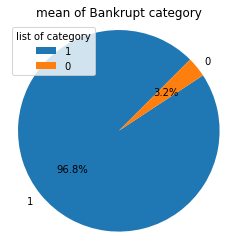

In [8]:
plt.figure(figsize=(4,4))
ab= df['Bankrupt?'].unique()
cd= df['Bankrupt?'].value_counts()#.tolist()
plt.pie(cd, labels=ab , autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.title('mean of Bankrupt category')
plt.legend(title='list of category')
plt.show()


### COUNT PLOT 

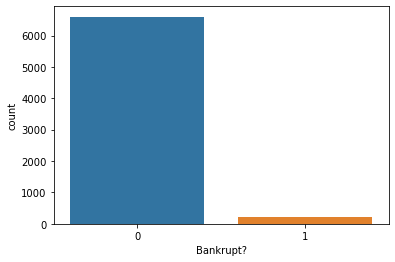

In [9]:
sns.countplot(x='Bankrupt?', data=df);

### CORRELATION OF TARGET VARIABLE 

In [10]:
df.corr()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
Degree of Financial Leverage (DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### PLOTING HEAT MAP

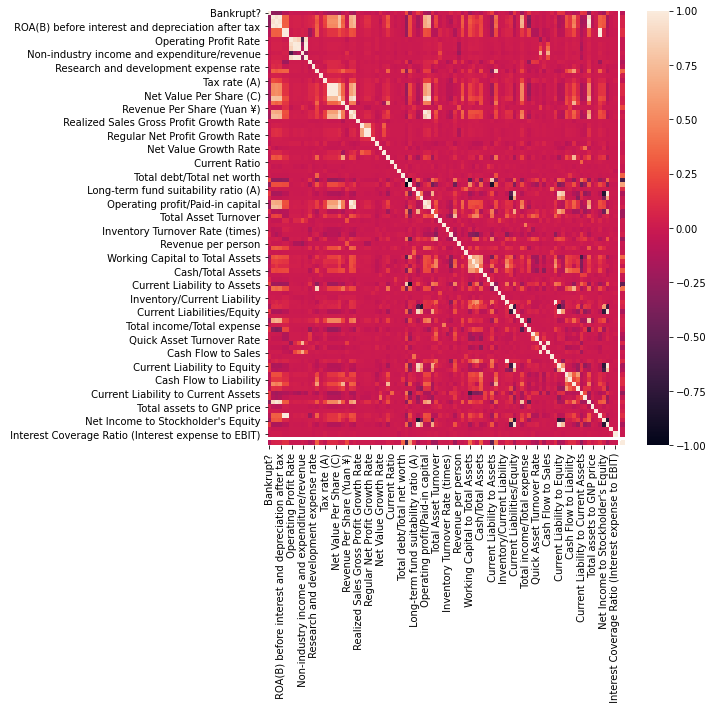

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr());


### SPLITTING DATA IN TRAIN & TEST CATEGORY

In [12]:
X = df.iloc[:,1:97]
Y = df.iloc[:,0]
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, random_state=0,test_size=0.2)

In [13]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### MACHINE LEARNING 

In [14]:
classifier = KNeighborsClassifier(n_neighbors=11, p=2 , metric='euclidean')
classifier.fit(X,Y)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [15]:
classifier.predict(X)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### CONFUSION MATRIX 

In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_predict))


[[1310    8]
 [  36   10]]


In [46]:
from sklearn.metrics import accuracy_score
print ("accuracy score:" , accuracy_score(Y_test , Y_predict))


accuracy score: 0.967741935483871


In [45]:
from sklearn.metrics import precision_score
print('precision_score :' , precision_score(Y_test, Y_predict))


precision_score : 0.5555555555555556


In [44]:
from sklearn.metrics import recall_score
print('recall_score :' , recall_score( Y_test, Y_predict))


recall_score : 0.21739130434782608


In [43]:
#method 1
from sklearn.metrics import f1_score
print('f1_score:' , f1_score(Y_test, Y_predict))


f1_score: 0.3125


In [42]:
#method 2
F1 = 2 * (0.5555555555555556 * 0.21739130434782608) / (0.5555555555555556 + 0.21739130434782608)
print('F1:' , F1)


F1: 0.3125


### CLASSIFICATION REPORT

In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.56      0.22      0.31        46

    accuracy                           0.97      1364
   macro avg       0.76      0.61      0.65      1364
weighted avg       0.96      0.97      0.96      1364



### SHOWING CONFUSION MATRIX VISUALLY

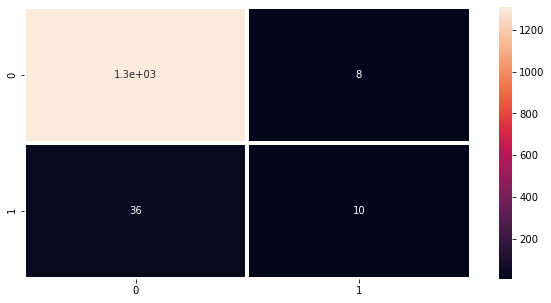

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(Y_test, Y_predict),linewidth = 3 , annot = True)

# THANK YOU